/Users/yujiuetsuki/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Index(['countryiso3code', 'date', 'value', 'unit', 'obs_status', 'decimal',
       'indicator.id', 'indicator.value', 'country.id', 'country.value'],
      dtype='object')
Index(['countryiso3code', 'date', 'value', 'unit', 'obs_status', 'decimal',
       'indicator.id', 'indicator.value', 'country.id', 'country.value'],
      dtype='object')
Index(['countryiso3code', 'date', 'value', 'unit', 'obs_status', 'decimal',
       'indicator.id', 'indicator.value', 'country.id', 'country.value'],
      dtype='object')
                     electricity_access  female_completion  male_completion  \
electricity_access             1.000000           0.771935         0.772908   
female_completion              0.771935           1.000000         0.942286   
male_completion                0.772908           0.942286         1.000000   
combined_completion            0.783751           0.987031         0.983812   

                     combined_completion  
electricity_access              0.783751  
fe

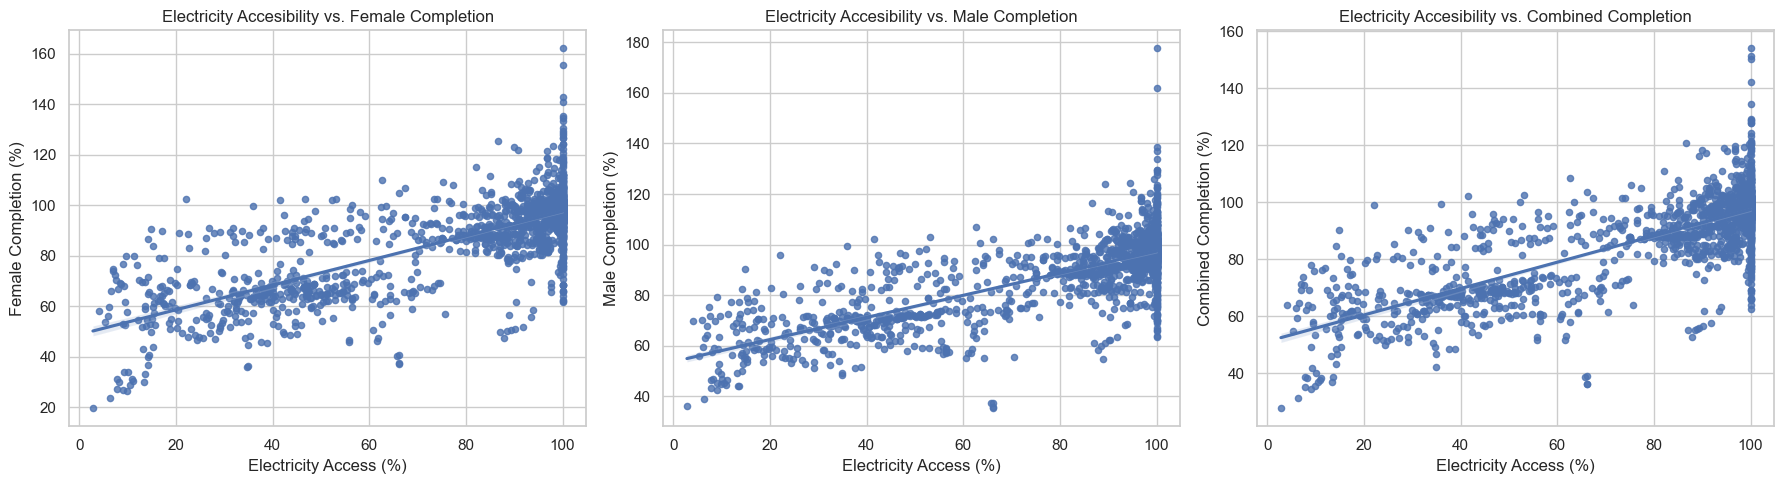

In [1]:
# Visualization #1  - Correlation between Eelectricty Access and Education Diparity

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data
def fetch_world_bank_data(indicator, start_year=2010, end_year=2020, per_page=10000):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}"
    params = {
        "date": f"{start_year}:{end_year}",
        "format": "json",
        "per_page": per_page
    }
    
    response = requests.get(url, params=params)
    json_data = response.json()

    if len(json_data) < 2 or not json_data[1]:
        raise ValueError("No data returned from API.")

    df = pd.json_normalize(json_data[1], sep=".")
    return df

# World Bank indicator codes
elec_df = fetch_world_bank_data("EG.ELC.ACCS.ZS") # Access to electricity
female_df = fetch_world_bank_data("SE.PRM.CMPT.FE.ZS") # Female education completion
male_df = fetch_world_bank_data("SE.PRM.CMPT.MA.ZS") # Male education completion

print(elec_df.columns)
print(female_df.columns)
print(male_df.columns)

# Merging Data
# Rename columns
elec_df = elec_df.rename(columns={"country.id": "country", "country.value": "country_name", "value": "electricity_access"})
female_df = female_df.rename(columns={"country.id": "country", "value": "female_completion"})
male_df = male_df.rename(columns={"country.id": "country", "value": "male_completion"})

# Merge all three datasets
merged = elec_df[["country", "country_name", "date", "electricity_access"]] \
    .merge(female_df[["country", "date", "female_completion"]], on=["country", "date"]) \
    .merge(male_df[["country", "date", "male_completion"]], on=["country", "date"])

merged = merged.dropna(subset=["electricity_access", "female_completion", "male_completion"])
merged["combined_completion"] = (merged["female_completion"] + merged["male_completion"]) / 2

#Analyzing Data
correlation_data = merged[[
    "electricity_access", 
    "female_completion", 
    "male_completion", 
    "combined_completion"
]]
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

## Scatterpolots

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Set up the figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for female completion
sns.regplot(
    data=merged,
    x="electricity_access",
    y="female_completion",
    ax=axes[0],
    scatter_kws={'s': 20}
)
axes[0].set_title("Electricity Accesibility vs. Female Completion")
axes[0].set_xlabel("Electricity Access (%)")
axes[0].set_ylabel("Female Completion (%)")

# Plot for male completion
sns.regplot(
    data=merged,
    x="electricity_access",
    y="male_completion",
    ax=axes[1],
    scatter_kws={'s': 20}
)
axes[1].set_title("Electricity Accesibility vs. Male Completion")
axes[1].set_xlabel("Electricity Access (%)")
axes[1].set_ylabel("Male Completion (%)")

# Plot for combined completion
sns.regplot(
    data=merged,
    x="electricity_access",
    y="combined_completion",
    ax=axes[2],
    scatter_kws={'s': 20}
)
axes[2].set_title("Electricity Accesibility vs. Combined Completion")
axes[2].set_xlabel("Electricity Access (%)")
axes[2].set_ylabel("Combined Completion (%)")

plt.tight_layout()
plt.show()